# HSE 2021: Mathematical Methods for Data Analysis

## Homework 1

### Attention!
* For tasks where <ins>text answer</ins> is required **Russian language** is **allowed**.
* If a task asks you to describe something (make coclusions) then **text answer** is **mandatory** and **is** part of the task
* **Do not** upload the dataset (titanic.csv) to the grading system (we already have it)
* We **only** accept **ipynb** notebooks. If you use Google Colab then you'll have to download the notebook before passing the homework
* **Do not** use python loops instead of NumPy vector operations over NumPy vectors - it significantly decreases performance (see why https://blog.paperspace.com/numpy-optimization-vectorization-and-broadcasting/), will be punished with -0.25 for **every** task. 
Loops are only allowed in part 1 (Tasks 1 - 4). 
* Some tasks contain tests. They only test you solution on a simple example, thus, passing the test does **not** guarantee you the full grade for the task. 

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Python (2 points)

**Task 1** (0.5 points)<br/> 
Enter numbers `a`,  `d` и `N`. Find sum of the first `N` members of arithmetic progression with the first member `a` and difference `d`, without using formula for the sum.

In [179]:
import math as math
def find_sum(a,d,N):
    if N < 1: return 0
    if type(N) != int: 
        N = math.floor(N)
    res = a
    for i in range(N-1):
        a += d
        res += a
    return res

In [7]:
print(np.random.seed(13))

None


Check yourself

In [180]:
a = 2
d = 3
N = 15
assert find_sum(a,d,N) == 345, 'Wrong answer'
assert find_sum(2, -1, -1) == 0, 'Wrong'
assert find_sum(0, 1, 4.2) == find_sum(0, 1, 4), 'Wrong'

---
**Task 2** (0.5 points) <br/> 
Enter an integer number `N`. Check if it is a prime number.

In [181]:
def check_prime(N):
    if N <= 1: return False
    i = 2
    while(i*i <= N):
        if(N%i==0): return False
        else: i += 1
    return True

Check yourself

In [182]:
inp = [3, 8, 13, 111, 113, 237, 307, 479, 481]
answer = [True, False, True, False, True, False, True, True, False]

for N, ans in zip(inp, answer):
    assert check_prime(N) == ans, f'Wrong answer for input {N}, {ans} is expected'
    
assert check_prime(0) == False, 'Wrong'
assert check_prime(-1) == False, 'Wrong'

---
**Task 3** (0.5 points) <br/> 
Find the first `N` prime numbers (you may use the function from the previous task).

In [183]:
def find_primes(N):
    p = 1
    res = []
    while N>0:
        p += 1
        if(check_prime(p)):
            res.append(p)
            N -=1
    return res


Check yourself

In [184]:
assert find_primes(0) == [], 'Wrong answer'
assert find_primes(1) == [2], 'Wrong answer'
assert find_primes(5) == [2, 3, 5, 7, 11], 'Wrong answer'

---
**Task 4** (0.5 points) <br/> 
There are numbers: `a`, `b`, `c`. Without using functions `min`, `max` or any other functions, find the maximum number.

In [185]:
def find_max(a, b, c):
    if a<=b:
        if b<=c: return c
        else: return b
    else:
        if a<=c: return c
        else: return a

Check yourself

In [186]:
from random import randint
for i in range(10):    
    a = randint(-100, 100)
    b = randint(-100, 100)
    c = randint(-100, 100)
    answer = np.max([a, b, c])  # You cannot use `np.max` in the solution ;)
    print(f'Checking on {a, b, c}')
    assert find_max(a, b, c) == answer, f'Wrong maximum, {answer} is expected'

Checking on (-45, -16, 7)
Checking on (67, -92, 47)
Checking on (9, -67, -53)
Checking on (-77, -25, 75)
Checking on (-53, 84, 72)
Checking on (69, 17, -87)
Checking on (100, 69, -66)
Checking on (51, 5, -56)
Checking on (57, -21, 47)
Checking on (-61, 80, -69)


# 2. Numpy (4 points)
### **!Do not use loops in the tasks below, see disclamer at the top of the notebook**

**Task 1** (0.5 points) <br/>
Create a random array (`np.random.rand()`) with length of 20 and with sum of its elements equals to 3.

In [187]:
my_array = np.random.rand(20)
my_array /= np.sum(my_array)/3

Check yourself

In [188]:
assert len(my_array) == 20
assert np.allclose(np.sum(my_array), 3)

---
**Task 2** (0.5 points) <br/>
Create two random arrays $a$ and $b$ with the same length. 

Calculate the following distances between the arrays **without using special functions. You may only use basic numpy operations (first level functions like `np.dot` are ok, higher level functions like `np.linalg.*` are prohibited).**:

* Euclidean Distance
$$ d(a, b) = \sqrt{\sum_i (a_i - b_i)^2} $$
* Manhattan Distance
$$ d(a, b) = \sum_i |a_i - b_i| $$
* Cosine Distance
$$ d(a, b) = 1 - \frac{a^\top b}{||a||_2\cdot||b||_2}, \,\, \text{where}\,\, ||a||_2 = \sqrt{\sum_i a_i^2} $$

In [191]:
def cal_euclidean(a, b):    
    return np.sqrt(np.sum((a-b)**2))

def cal_manhattan(a, b):   
    return np.sum(np.abs(a-b))
    
def cal_cosine(a, b):   
    return 1 - np.dot(a,b)/(np.sqrt(np.sum(a**2))*np.sqrt(np.sum(b**2)))

Check yourself

In [192]:
a = np.ones(10)*0.1
b = np.ones(10)

assert np.allclose(cal_euclidean(a, b), 2.846049)
assert np.allclose(cal_manhattan(a, b), 9)
assert np.allclose(cal_cosine(a, b), 0)

---
**Task 3** (0.5 points) <br/>
Create a function `custom_scaler`, which takes as input an array with integer values and transforms an array, so that:
* Maximum element(s) value is 2 (it **doesn't** mean `a[max_index] = 2`)
* Minimum element(s) value is -2 (it **doesn't** mean `a[min_index] = -2`)
* Other values are in the interval [-2, 2] (using **arithmetic** transformations)

In [193]:
def custom_scaler(my_array):
    max = np.max(my_array)
    my_array -= max
    new_array = my_array / np.min(my_array)
    new_array *= 4
    new_array -= 2
    return new_array

Check yourself

In [194]:
test_array = np.random.randint(-100, 100, size=4)
result = custom_scaler(test_array)
print(test_array, '->>', result)

assert np.allclose(np.max(result), 2), f'Maximum value shoul be 2, got {np.max(result)} instead'
assert np.allclose(np.min(result), -2), f'Minimum value should be -2, got {np.min(result)} instead'
assert np.sum(result < -2) + np.sum(result > 2) == 0, 'All elements are supposed to be between -2 and 2'

[-104    0  -11  -23] ->> [ 2.         -2.         -1.57692308 -1.11538462]


---
**Task 4** (0.5 points) <br/>
Create an array with shape of $5 \times 6$ with integers from [0,50]. Select a column which contains the maximum element of the array.

In [195]:
my_array = np.random.randint(0,51,(5,6))
index = np.argmax(my_array)
index2d = np.unravel_index(index, np.shape(my_array))
selected_column = my_array[:, index2d[1]]

In [196]:
print(f'Array:\n {my_array}')
print(f'Shape: {my_array.shape}')
print(f'Selected column {selected_column}')

Array:
 [[30 40 24  9 15 42]
 [20 22 45  2 37 45]
 [17  8  6 35 16 18]
 [31 14 19 43 45 32]
 [ 0 30 25 23  4 38]]
Shape: (5, 6)
Selected column [24 45  6 19 25]


---
**Task 5** (0.5 points) <br/>

Replace all missing values in the following array with mean.

In [197]:
arr = np.random.rand(10)
idx = np.random.randint(0, 10, 4)
arr[idx] = np.nan

print(f'Given array: {np.array2string(arr, precision=2)}')

Given array: [0.03 0.07 0.16 0.2   nan  nan 0.74  nan 0.62  nan]


In [198]:
ind = np.where(np.isnan(arr)==False)
mean = np.mean(arr[ind])
arr[np.where(np.isnan(arr) == True)] = mean

print(f'Result: {np.array2string(arr, precision=2)}')

Result: [0.03 0.07 0.16 0.2  0.3  0.3  0.74 0.3  0.62 0.3 ]


---
**Task 6** (0.5 points) <br/>
Create a function which takes an image ```X``` (3D array of the shape (n, m, 3)) as an input and returns the mean for each of 3 channels (a vector of shape 3).

In [199]:
def mean_channel(X):
    xAxis = np.mean(X[:,:,0])
    yAxis = np.mean(X[:,:,1])
    zAxis = np.mean(X[:,:,2])
    res = [xAxis, yAxis, zAxis]
    return res

In [200]:
n = 28
m = 16
X =  np.random.randint(-10, 10, size=(n,m,3))
mean_channel(X)

[-0.5691964285714286, -1.0558035714285714, -0.3125]

---
**Task 7** (1 points) <br/>
Create a function which takes a matrix ```X``` as an input and returns all its unique rows as a matrix, i.e. in a 3D matrix you need to return all unique horizontal layers.

Sample input:

     ([[[4, 4],
        [5, 5]],

       [[4, 5],
        [5, 5]],

       [[4, 4],
        [5, 4]],

       [[4, 5],
        [5, 5]],

       [[5, 4],
        [4, 4]],

       [[5, 5],
        [4, 5]]])
        
Sample output:

     ([[[4, 4],
        [5, 5]],

       [[4, 5],
        [5, 5]],

       [[4, 4],
        [5, 4]],

       [[5, 4],
        [4, 4]],

       [[5, 5],
        [4, 5]]])

In [201]:
def get_unique_rows(X):
    res = np.unique(X, axis=0)
    return res

In [202]:
X =  np.random.randint(4, 6, size=(n, 2, 2))
print(X)
get_unique_rows(X)

[[[4 5]
  [5 4]]

 [[5 5]
  [4 5]]

 [[5 4]
  [5 5]]

 [[4 4]
  [4 4]]

 [[4 5]
  [4 5]]

 [[4 4]
  [4 4]]

 [[4 5]
  [5 5]]

 [[5 4]
  [4 5]]

 [[5 4]
  [4 5]]

 [[4 5]
  [4 4]]

 [[4 4]
  [5 4]]

 [[4 4]
  [4 5]]

 [[4 5]
  [4 5]]

 [[5 4]
  [4 4]]

 [[5 4]
  [5 5]]

 [[4 5]
  [4 5]]

 [[4 5]
  [5 5]]

 [[4 4]
  [5 4]]

 [[5 5]
  [5 4]]

 [[4 4]
  [4 4]]

 [[4 5]
  [5 5]]

 [[4 4]
  [4 4]]

 [[4 4]
  [4 5]]

 [[5 4]
  [4 5]]

 [[5 5]
  [4 4]]

 [[4 4]
  [4 5]]

 [[5 4]
  [4 5]]

 [[5 5]
  [4 5]]]


array([[[4, 4],
        [4, 4]],

       [[4, 4],
        [4, 5]],

       [[4, 4],
        [5, 4]],

       [[4, 5],
        [4, 4]],

       [[4, 5],
        [4, 5]],

       [[4, 5],
        [5, 4]],

       [[4, 5],
        [5, 5]],

       [[5, 4],
        [4, 4]],

       [[5, 4],
        [4, 5]],

       [[5, 4],
        [5, 5]],

       [[5, 5],
        [4, 4]],

       [[5, 5],
        [4, 5]],

       [[5, 5],
        [5, 4]]])

# 3. Pandas & Visualization (4 points)


You are going to work with *Titanic* dataset which contains information about passengers of Titanic:
- **Survived** - 1 - survived, 0 - died (0); **Target variable**
- **pclass** - passengers's class;
- **sex** - passengers's sex
- **Age** - passengers's age in years
- **sibsp**    - is the passenger someones siblings   
- **parch**    - is the passenger someones child or parent
- **ticket** - ticket number    
- **fare** - ticket price    
- **cabin** - cabin number
- **embarked** - port of Embarkation; C = Cherbourg, Q = Queenstown, S = Southampton

**Note** for all visualizations use matplotlib or seaborn but NOT plotly! Plotly's graphics sometimes vanish after saving. In this case the task wont't be graded.

**Note** support all your answers with necessary code, computations, vizualization, and explanation. Answers without code and explanation won't be graded.

**Task 0** (0 points) \
Load the dataset

In [2]:
dataset = pd.read_csv("titanic.csv", index_col=0)
dataset.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


---
**Task 1** (1 points) <br/>
Answer the following questions:
    
    * Are there any missing values? In which columns?
    * How many classes (pclass) were there on Tinanic?
    * What is the percentage of survived passengers? Are the classes balanced?
    * What is the average ticket fare?
    * What was the most popular port of embarkation?
Please, write not only the answers but the code, proving it.

In [3]:
## >Are there any missing values? In which columns?

dataset.info()
print('\nColumns with null values:')
np.round(dataset.isna().sum()[dataset.isna().sum()>0] / dataset.shape[0], 2)

## There are some, as we can see. 
## There are 891 rows and with the help of "info" function we can see
## how many non-null values in rows correspond to each column.
## We can count it with more precision and see that most information is missing from the "cabin" column (77%), 
## second is "age" (20%) and "embarked" column, which lacks 2 values.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB

Columns with null values:


Age         0.20
Cabin       0.77
Embarked    0.00
dtype: float64

In [4]:
## >How many classes (pclass) were there on Tinanic?

pclassColumn = dataset["Pclass"]
pclassColumnU = pclassColumn.unique()
print(f'Number of classes on Titanic: {len(pclassColumnU)}')

## We can determine the number of classes by 
## calling the "unique" function on the column, the result is 3.

Number of classes on Titanic: 3


In [5]:
## >What is the percentage of survived passengers? 

print(f'The percentage of survived passengers is {np.round(len(dataset[dataset["Survived"]==1])*100 / dataset.shape[0],3)}%')

## This is clearly unbalanced.

The percentage of survived passengers is 38.384%


In [7]:
## >Are the classes balanced?
class1 = dataset[dataset["Pclass"] == 1]
class2 = dataset[dataset["Pclass"] == 2]
class3 = dataset[dataset["Pclass"] == 3]

print(f'Survived in 1st class: {np.round(len(class1[class1["Survived"]==1])*100 / class1.shape[0],3)}%')
print(f'Survived in 2nd class: {np.round(len(class2[class2["Survived"]==1])*100 / class2.shape[0],3)}%')
print(f'Survived in 3rd class: {np.round(len(class3[class3["Survived"]==1])*100 / class3.shape[0],3)}%')

## No, the classes aren't balanced in survival. As we can see, the rate of survival is higher, the higher the class is.

Survived in 1st class: 62.963%
Survived in 2nd class: 47.283%
Survived in 3rd class: 24.236%


In [8]:
## (Also i thought this question might refer to the sizes of classes themselves, so i counted it as well just in case)

print(f'In class 1 there were {len(class1)} passengers')
print(f'In class 2 there were {len(class2)} passengers')
print(f'In class 3 there were {len(class3)} passengers')

## So, the classes aren't balanced, the 3rd is the largest, the 1st is more than by half smaller
## and the 2nd is a little smaller than the 1st

In class 1 there were 216 passengers
In class 2 there were 184 passengers
In class 3 there were 491 passengers


In [9]:
## >What is the average ticket fare?

print(f'The average ticket fare is {np.round(np.sum(dataset["Fare"]) / dataset.shape[0],3)}')

The average ticket fare is 32.204


In [9]:
## >What was the most popular port of embarkation?

portQ = dataset[dataset["Embarked"] == 'Q']
portC = dataset[dataset["Embarked"] == 'C']
portS = dataset[dataset["Embarked"] == 'S']

print(f'{len(portQ)} passengers embarked in port Q')
print(f'{len(portC)} passengers embarked in port C')
print(f'{len(portS)} passengers embarked in port S')

print(f'\nThe port where most passengers embarked is {max([portQ, portC, portS], key=lambda x: len(x))["Embarked"][1]}')

## And S stands for Southampton, therefore Southampton is the most popular port of embarkation.

77 passengers embarked in port Q
168 passengers embarked in port C
644 passengers embarked in port S

The port where most passengers embarked is S


---
**Task 2** (1 points) <br/>
Find all the titles of the passengers (example, *Capt., Mr.,Mme.*), which are written in the column `Name`, and answer the following questions:

    * How many are there unique titles?
    * How many are there passengers with every title?
    * What is the most popular man's title? And woman's title?
    
**Hint** You may select the title from the name as a word which contains a dot.

In [10]:
## >How many are there unique titles

wTitles =  dataset[dataset["Name"].str.find('.')>-1]
names = dataset.iloc[:, 2:3]
titles = names["Name"].str.extract(r' ([a-zA-Z]+\.) ')

print(f'There are {titles[0].nunique()} unique titles: {titles[0].unique()}')

There are 17 unique titles: ['Mr.' 'Mrs.' 'Miss.' 'Master.' 'Don.' 'Rev.' 'Dr.' 'Mme.' 'Ms.' 'Major.'
 'Lady.' 'Sir.' 'Mlle.' 'Col.' 'Capt.' 'Countess.' 'Jonkheer.']


In [96]:
## >How many are there passengers with every title?

print('The titles and their numbers:')
titles.value_counts()

The titles and their numbers:


Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Major.         2
Col.           2
Mlle.          2
Mme.           1
Ms.            1
Capt.          1
Lady.          1
Jonkheer.      1
Don.           1
Countess.      1
Sir.           1
dtype: int64

In [207]:
## >What is the most popular man's title? And woman's title?

titlesAndSex = pd.concat([titles, dataset["Sex"]], axis= 1 )
print("The most popular title among men is ", titlesAndSex[titlesAndSex["Sex"] == 'male'][0].value_counts().idxmax())
print("The most popular title among women is ", titlesAndSex[titlesAndSex["Sex"] == 'female'][0].value_counts().idxmax())

The most popular title among men is  Mr.
The most popular title among women is  Miss.


---
**Task 3** (0.5 points) <br/>
Visualize age distribution (you may use a histogram, for example). 

    * What is the minimal and maximum ages of the passengers? Visualize it on the plot
    * What is the mean age? Visualize it on the plot
    * Make conclusions about what you see on the plot

Minimal and maximal ages of the passengers are 0.42 and 80.0


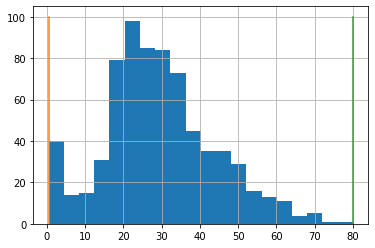

In [208]:
## >What is the minimal and maximum ages of the passengers? Visualize it on the plot

dataset["Age"].hist(bins=20)
min = np.min(dataset["Age"])
max = np.max(dataset["Age"])
print(f'Minimal and maximal ages of the passengers are {min} and {max}')
plt.plot((min, min), (0, 100))
plt.plot((max, max), (0, 100))
plt.show()

Mean age is 29.69911764705882


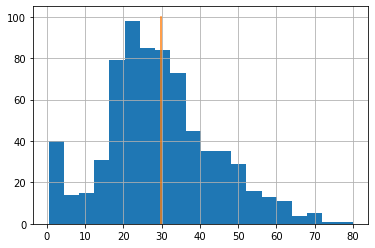

In [209]:
## >What is the mean age? Visualize it on the plot

dataset["Age"].hist(bins=20)
mean = np.mean(dataset["Age"])
print(f'Mean age is {mean}')
plt.plot((mean, mean), (0, 100))
plt.show()

In [ ]:
## >Make conclusions about what you see on the plot

## The distribution looks a bit like chi-square (or normal but with a lot more outliers) 
## but it is clearly disbalanced to the right, there seemed to be quite a lot of children below the age of five,
## mainly there were young adults.

---
**Task 4** (0.5 points) <br/>
Visualize age distribution for survived and not survived passengers separately and calculate the mean age for each class. Are they different? Make conclusions about what you see on the plot

Mean age for the survivors is 28.343689655172415 and for the non-survivors is 30.62617924528302


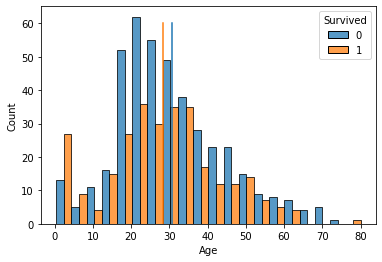

In [210]:
## I didn't exactly understand whether 'class' here refers to plasses or 'survived' and 'not survived',
## so, once again, i plotted both

sns.histplot(x="Age", hue="Survived", data=dataset, multiple="dodge")

meanSurvive = np.mean(dataset[dataset["Survived"]== 1]["Age"])
meanNotSurvive = np.mean(dataset[dataset["Survived"]== 0]["Age"])

print(f'Mean age for the survivors is {meanSurvive} and for the non-survivors is {meanNotSurvive}')

plt.plot((meanSurvive, meanSurvive), (0, 60), 'C1')
plt.plot((meanNotSurvive, meanNotSurvive), (0, 60), 'C0')
plt.show()

## Here are categories and means for ages of passengers who survived and those who did not
## It seems that mean age doesn't differ much and in both cases is close to the general mean age
## Also it shows that mostly the distributions of survivors and non-survivors are alike with the exception that
## small children were more likely to survive than to die, and young adults (~ 18-30) were more likely to die than to live
## For everyone else the chances are pretty much equal and probably don't depend on age.

Mean age for the 1st class is 38.233440860215055
Mean age for the 2nd class is 29.87763005780347
Mean age for the 3rd class is 25.14061971830986


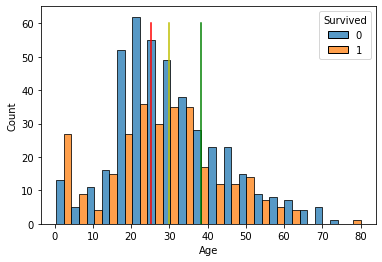

In [155]:
sns.histplot(x="Age", hue="Survived", data=dataset, multiple="dodge")
mean1 = np.mean(dataset[dataset["Pclass"]== 1]["Age"])
mean2 = np.mean(dataset[dataset["Pclass"]== 2]["Age"])
mean3 = np.mean(dataset[dataset["Pclass"]== 3]["Age"])

print(f'Mean age for the 1st class is {mean1}')
print(f'Mean age for the 2nd class is {mean2}')
print(f'Mean age for the 3rd class is {mean3}')
plt.plot((mean1, mean1), (0, 60), 'g', label = '1st class')
plt.plot((mean2, mean2), (0, 60), 'y', label = '2nd class')
plt.plot((mean3, mean3), (0, 60), 'r', label = '3rd class')
plt.show()

## Here are categories for ages of passengers who survived and those who did not and means for pclasses
## As we can see, mean for the 1st class lies further to the left, probably because older people are richer, 
## and a lot of people in lower pclasses were young working-class passengers
## Also this in some way illustrates the rates of survival for classes: 
## the mean for 3rd class lies in the age category where the chance of survival is almost 
## two times less than the chance of death, and the percentage of survivors there was 24%
## For the 2nd class the mean age is in the age group where the difference in chances is smaller,
## but still death is more likely, and 47% survived
## The 1st class mean age is in the age group where life and death are almost equal in chance, 63% of survivors

---
**Task 5** (0.5 points) <br/>
Is there correlation between the port of embarkation and the ticket price? Calculate mean price for each port and visualize price distribution for each port. Make conclusions about what you see on the plot

Hint: you could make one or several plot types i.e.  box, violine, pair, histogram (see additional notebooks for Seminar 1 "Visualization with Seaborn"). The main point here is to **choose** plots wisely and **make meaningful conclusions**



Mean fare for the Queenstown's port is 13.276029870129872
Mean fare for the Southampton's port is 27.07981180124218
Mean fare for the Cherbourg's port is 59.95414404761905


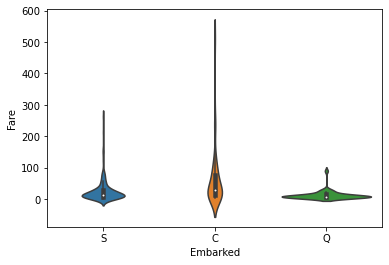

In [211]:
meanQ = np.mean(dataset[dataset["Embarked"]== 'Q']["Fare"])
meanS = np.mean(dataset[dataset["Embarked"]== 'S']["Fare"])
meanC = np.mean(dataset[dataset["Embarked"]== 'C']["Fare"])

print(f'Mean fare for the Queenstown\'s port is {meanQ}')
print(f'Mean fare for the Southampton\'s port is {meanS}')
print(f'Mean fare for the Cherbourg\'s port is {meanC}')


sns.violinplot(x= dataset.Embarked, y=dataset.Fare)
plt.show()

## Just by the means we can suppose that Cherbourg was the most expensive port to buy tickets and Queenstown was the cheapest
## However the violin plots show that Cherbourg had some huge outliers (three tickets for 512 each).

---
**Task 6** (0.5 points) <br/>
The same question as in task 5 about correlation between *pclass* and *ticket priсe*.

Firstly, we can calculate the correlation itself: -0.5494996199439077
Mean fare for the 1st class is 84.15468749999992
Mean fare for the 2nd class is 20.66218315217391
Mean fare for the 3rd class is 13.675550101832997


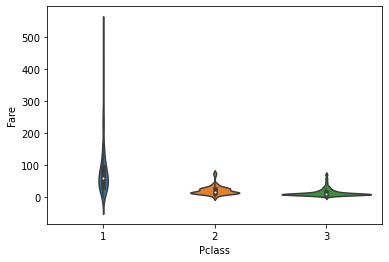

In [212]:
## You code here

print(f'Firstly, we can calculate the correlation itself: {dataset.Pclass.corr(dataset.Fare)}')

mean1 = np.mean(dataset[dataset["Pclass"]== 1]["Fare"])
mean2 = np.mean(dataset[dataset["Pclass"]== 2]["Fare"])
mean3 = np.mean(dataset[dataset["Pclass"]== 3]["Fare"])

print(f'Mean fare for the 1st class is {mean1}')
print(f'Mean fare for the 2nd class is {mean2}')
print(f'Mean fare for the 3rd class is {mean3}')


sns.violinplot(x= dataset.Pclass, y=dataset.Fare)
plt.show()

## The correlation is rather clear, 1st class being the most expensive and 3rd the cheapest, then again the three super
## expensive tickets are in the 1st class statistics as well.

In [ ]:
## У меня возник некоторый вопрос про историю создания этого датасета и репрезентативность всего, что связано с 
## информацией про возраст выживших. Погуглив человека, которому было 80,(Algernon Henry Barkworth) я обнаружила, 
## что 80 лет ему было не на момент катастрофы, а в 1947 году, когда он умер по естественным причинам, 
## на момент же путешествия на Титанике ему было 45.
## В то же время погуглив другую выжившую пассажирку (Virginia Ethel Emanuel) я обнаружила, 
## что ее возраст (5 лет) - все-таки примерно возраст в момент плавания, так как дальнейшая ее судьба не известна,
## хотя она и выжила.
## Получается, категория возраста вообще репрезентативна только для тех, кто погиб? Для выживших это может быть как 
## возраст тогда, так и их возраст на момент смерти, не связанной с Титаником. Как тогда анализировать происходящее?
## Не знаю, где я ожидаю узнать ответ на эти вопросы, но в любом случае хочу сказать, что задание очень интересное, 
## пробуждает любопытство, спасибо большое))